In [53]:
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings

warnings.filterwarnings('ignore')

In [2]:
cw=pd.read_csv('covidworld.csv', encoding = "ISO-8859-1")

In [3]:
#checking dtypes

cw.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [4]:
#Splitting date

cw['Month']=pd.to_datetime(cw['Date']).dt.month
cw['Day']=pd.to_datetime(cw['Date']).dt.day
cw['Year']=pd.to_datetime(cw['Date']).dt.year
cw['Week']=pd.to_datetime(cw['Date']).dt.week

In [5]:
cw.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Month,Day,Year,Week
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,4,18,2020,16
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,4,18,2020,16
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,4,18,2020,16
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,4,18,2020,16
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,4,18,2020,16


In [6]:
cw.drop('Date',axis=1)

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Month,Day,Year,Week
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,4,18,2020,16
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,4,18,2020,16
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,4,18,2020,16
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,4,18,2020,16
4,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,4,18,2020,16
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,5,18,2020,21
6599,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,5,18,2020,21
6600,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,5,18,2020,21
6601,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,5,18,2020,21


In [7]:
#Checking for null values..
cw.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
Month                     0
Day                       0
Year                      0
Week                      0
dtype: int64

In [8]:
#Dropping null values..

cw.dropna()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Month,Day,Year,Week
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,4,18,2020,16
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,4,18,2020,16
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,4,18,2020,16
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,4,18,2020,16
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0,4,18,2020,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,2020-05-18,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0,5,18,2020,21
6556,2020-05-18,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0,5,18,2020,21
6559,2020-05-18,Sint Maarten,42817,414.0,77.0,15.0,54.0,7.0,8.0,5,18,2020,21
6560,2020-05-18,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0,5,18,2020,21


In [9]:
cwn=cw.drop('Date',axis=1)

In [10]:
cwn.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Month,Day,Year,Week
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,4,18,2020,16
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,4,18,2020,16
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,4,18,2020,16
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,4,18,2020,16
4,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,4,18,2020,16


In [12]:
cwf=cwn.dropna()

In [13]:
cwf.isnull().sum()

Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
Month                  0
Day                    0
Year                   0
Week                   0
dtype: int64

In [14]:
cwf.shape

(3514, 12)

In [18]:
#EDA univariate analysis

num_cols=[col for col in cwf.columns if cwf[col].dtypes!='O']
num_cols

['Population',
 'Total Tests',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Serious or Critical',
 'Active Cases',
 'Month',
 'Day',
 'Year',
 'Week']

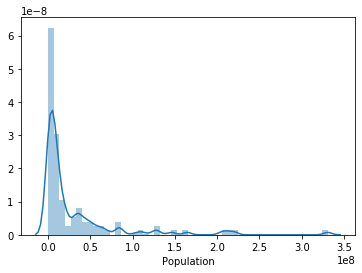

In [21]:
sbn.distplot(cwf['Population'])

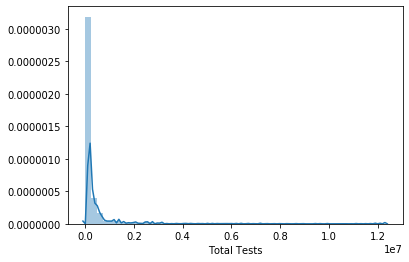

In [22]:
sbn.distplot(cwf['Total Tests'])

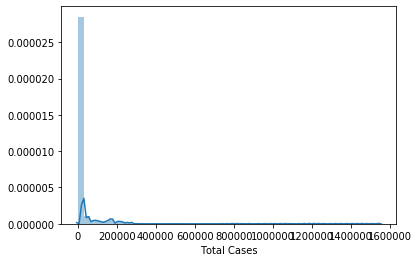

In [23]:
sbn.distplot(cwf['Total Cases'])

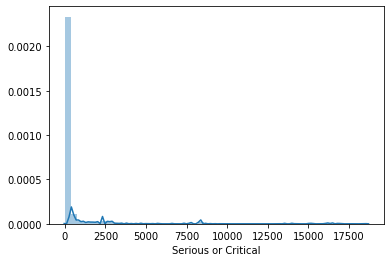

In [24]:
sbn.distplot(cwf['Serious or Critical'])

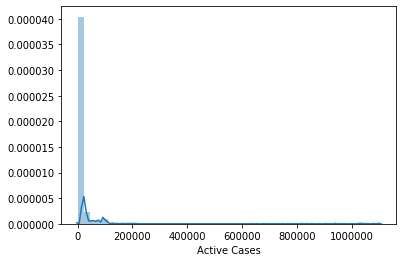

In [25]:
sbn.distplot(cwf['Active Cases'])

In [26]:
catcols=[col for col in cwf.columns if cwf[col].dtypes=='O']
catcols

['Country']

In [28]:
#Creating deathrate var

death_rate=pd.Series(dtype=float)



In [30]:
cwf.columns.values

array(['Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases', 'Month', 'Day', 'Year', 'Week'], dtype=object)

In [38]:
#Calculating death rate

if(cwf['Total Deaths'].index==cwf['Total Cases'].index).all():
    death_rate=cwf['Total Deaths'].values/(cwf['Total Cases'].values + cwf['Total Deaths'].values)

In [35]:
cwf['Total Deaths'].values

array([3.9014e+04, 3.1300e+02, 2.0043e+04, ..., 1.5000e+01, 3.0000e+00,
       3.0000e+00])

In [39]:
death_rate

array([0.05015904, 0.00843529, 0.09345842, ..., 0.16304348, 0.04109589,
       0.10714286])

In [41]:
cwf['drate']=pd.DataFrame(death_rate)

In [48]:
#Encoding country in the dataset

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cwf['encoded_country']=pd.DataFrame(le.fit_transform(cwf['Country']))


In [49]:
cwf.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Month,Day,Year,Week,drate,encoded_country
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,4,18,2020,16,0.050159,121.0
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,4,18,2020,16,0.008435,102.0
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,4,18,2020,16,0.093458,113.0
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,4,18,2020,16,0.060410,21.0
5,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0,4,18,2020,16,0.112923,42.0


In [67]:
cwo=cwf.drop('Country',axis=1)
covid=cwo.dropna()

In [68]:
#Seperating features and label

x=covid.drop('drate',axis=1)

In [69]:
y=covid['drate']

In [70]:
#Implementing the linear models 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [73]:
predy=lr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,predy))
print('Mean Squared Error:',mean_squared_error(y_test,predy))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predy)))


Mean Absolute Error: 0.0233775976563597
Mean Squared Error: 0.00089591002119275
Root Mean Squared Error: 0.029931756065970302


In [74]:
dtr=DecisionTreeRegressor(criterion='mse',
 max_leaf_nodes=16,
 min_impurity_decrease=0.0,
 min_samples_leaf= 4,
 min_samples_split=4,
 splitter='best')
dtr.fit(x_train,y_train)
dtrpr=dtr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,dtrpr))
print('Mean Squared Error:',mean_squared_error(y_test,dtrpr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtrpr)))

Mean Absolute Error: 0.01768443250132745
Mean Squared Error: 0.0005590129238500957
Root Mean Squared Error: 0.023643454143802586


In [75]:
#Fitting the final model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,rfp))
print('Mean Squared Error:',mean_squared_error(y_test,rfp))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfp)))

Mean Absolute Error: 0.005523610604068809
Mean Squared Error: 7.517928037167448e-05
Root Mean Squared Error: 0.008670598616685845


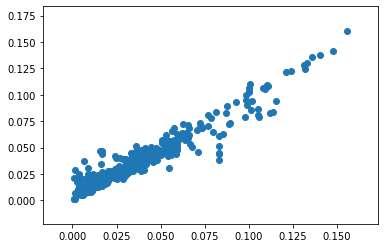

In [78]:
#plotting the actual vs predicted..

import matplotlib.pyplot as plt
plt.scatter(y_test,rfp)
plt.show()

In [79]:
#Saving the predicted values to csv

rfo=pd.DataFrame(rfp,columns=['deathrate'])


In [80]:
rfo.head()

,deathrate
0,0.054454
1,0.007589
2,0.080743
3,0.043483
4,0.034711


In [81]:
y_test.head()

945     0.050547
2182    0.006656
106     0.105263
8       0.058569
2577    0.041783
Name: drate, dtype: float64

In [82]:
#Saving to csv
rfo.to_csv('covid_drateprediction.csv',index=False)

In [83]:
#Saving model

import joblib

joblib.dump(rf,'covidworld_drate.pkl')

['covidworld_drate.pkl']